# Model Comparison

In [1]:
from pickle import load
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
from sklearn.metrics import classification_report

In [2]:
# Dependencies for cross val code
import matplotlib.pyplot as plt
from sklearn import model_selection

## Load training sets

In [3]:
X_train_scaled = pd.read_csv("test_train_data/X_train_scaled.csv")
X_train_scaled_sk = pd.read_csv("test_train_data/X_train_scaled_sk.csv")
X_train_scaled_cs = pd.read_csv("test_train_data/X_train_scaled_cs.csv")
y_train_categorical = pd.read_csv("test_train_data/y_train_categorical.csv")
encoded_y_train = pd.read_csv("test_train_data/encoded_y_train.csv")

## Load testing set

In [4]:
X_test_scaled = pd.read_csv("test_train_data/X_test_scaled.csv")
X_test_scaled_sk = pd.read_csv("test_train_data/X_test_scaled_sk.csv")
X_test_scaled_cs = pd.read_csv("test_train_data/X_test_scaled_cs.csv")
encoded_y_test = pd.read_csv("test_train_data/encoded_y_test.csv")
y_test_categorical = pd.read_csv("test_train_data/y_test_categorical.csv")

## Load all Models

In [5]:
# knn = load(open('knn_trained.pkl', 'rb'))
knn_all = load(open('pickles/knn_trained_all.pkl', 'rb'))
knn_sk = load(open('pickles/knn_trained_sk.pkl', 'rb'))
knn_cs = load(open('pickles/knn_trained_cs.pkl', 'rb'))

In [6]:
# log_reg = load(open('logistic_model_trained.pkl', 'rb'))
log_reg_all = load(open('pickles/logistic_model_trained_all.pkl', 'rb'))
log_reg_sk = load(open('pickles/logistic_model_trained_sk.pkl', 'rb'))
log_reg_cs = load(open('pickles/logistic_model_trained_cs.pkl', 'rb'))

In [7]:
# deep_model = load_model("deep_model_trained.h5")
deep_model_all = load_model("pickles/deep_model_trained_all.h5")
deep_model_sk = load_model("pickles/deep_model_trained_sk.h5")
deep_model_cs = load_model("pickles/deep_model_trained_cs.h5")

In [8]:
# random_forest = load(open('randomforest_trained.pkl', 'rb'))
random_forest_all = load(open('pickles/randomforest_trained_all.pkl', 'rb'))
random_forest_sk = load(open('pickles/randomforest_trained_sk.pkl', 'rb'))
random_forest_cs = load(open('pickles/randomforest_trained_cs.pkl', 'rb'))

In [9]:
# svm = load(open('svm_model_trained.pkl', 'rb'))
svm_all = load(open('pickles/svm_model_trained_all.pkl', 'rb'))
svm_sk = load(open('pickles/svm_model_trained_sk.pkl', 'rb'))
svm_cs = load(open('pickles/svm_model_trained_cs.pkl', 'rb'))

## Evaluate all tuned Models against same test set

### KNN

In [10]:
knn_accuracy_all = metrics.accuracy_score(encoded_y_test, knn_all.predict(X_test_scaled))
knn_accuracy_all

0.971830985915493

In [11]:
knn_accuracy_sk = metrics.accuracy_score(encoded_y_test, knn_sk.predict(X_test_scaled_sk))
knn_accuracy_sk

0.971830985915493

In [12]:
knn_accuracy_cs = metrics.accuracy_score(encoded_y_test, knn_cs.predict(X_test_scaled_cs))
knn_accuracy_cs

0.9436619718309859

### Logistic Regression

In [13]:
log_reg_accuracy_all = accuracy_score(encoded_y_test,log_reg_all.predict(X_test_scaled))
log_reg_accuracy_all

0.9788732394366197

In [14]:
log_reg_accuracy_sk = accuracy_score(encoded_y_test,log_reg_sk.predict(X_test_scaled_sk))
log_reg_accuracy_sk

0.971830985915493

In [15]:
log_reg_accuracy_cs = accuracy_score(encoded_y_test,log_reg_cs.predict(X_test_scaled_cs))
log_reg_accuracy_cs

0.971830985915493

### Neural Netwrok

In [16]:
deep_model_loss_all, deep_model_accuracy_all = deep_model_all.evaluate(X_test_scaled, y_test_categorical, verbose=2)

5/5 - 0s - loss: 0.1084 - accuracy: 0.9789


In [17]:
deep_model_loss_sk, deep_model_accuracy_sk = deep_model_sk.evaluate(X_test_scaled_sk, y_test_categorical, verbose=2)

5/5 - 0s - loss: 0.0852 - accuracy: 0.9718


In [18]:
deep_model_loss_cs, deep_model_accuracy_cs = deep_model_cs.evaluate(X_test_scaled_cs, y_test_categorical, verbose=2)

5/5 - 0s - loss: 0.1207 - accuracy: 0.9648


### Random Forest

In [19]:
random_forest_accuracy_all = random_forest_all.score(X_test_scaled.values, encoded_y_test.iloc[:,0])
random_forest_accuracy_all

0.9647887323943662

In [20]:
random_forest_accuracy_sk = random_forest_sk.score(X_test_scaled_sk.values, encoded_y_test.iloc[:,0])
random_forest_accuracy_sk

0.9577464788732394

In [21]:
random_forest_accuracy_cs = random_forest_cs.score(X_test_scaled_cs.values, encoded_y_test.iloc[:,0])
random_forest_accuracy_cs

0.9577464788732394

### SVM

In [22]:
svm_accuracy_all = metrics.accuracy_score(encoded_y_test, svm_all.predict(X_test_scaled))
svm_accuracy_all

0.971830985915493

In [23]:
svm_accuracy_sk = metrics.accuracy_score(encoded_y_test, svm_sk.predict(X_test_scaled_sk))
svm_accuracy_sk

0.971830985915493

In [24]:
svm_accuracy_cs = metrics.accuracy_score(encoded_y_test, svm_cs.predict(X_test_scaled_cs))
svm_accuracy_cs 

0.971830985915493

In [25]:
label = ['KNN', 'LGR', 'NN', 'RF', 'SVM']

In [26]:
accurs_all = [knn_accuracy_all, log_reg_accuracy_all, deep_model_accuracy_all, 
              random_forest_accuracy_all, svm_accuracy_all]
accurs_sk = [knn_accuracy_sk, log_reg_accuracy_sk, deep_model_accuracy_sk, 
             random_forest_accuracy_sk, svm_accuracy_sk]
accurs_cs = [knn_accuracy_cs, log_reg_accuracy_cs, deep_model_accuracy_cs, 
             random_forest_accuracy_cs, svm_accuracy_cs]

In [27]:
# accurs_cs

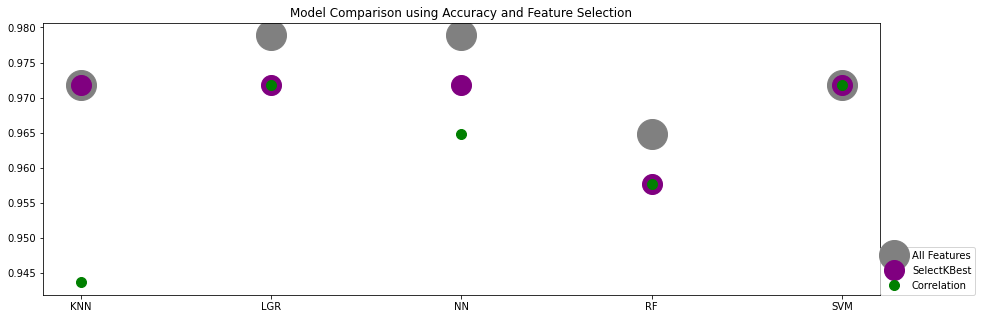

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(label, accurs_all, label="All Features", color='grey', marker='o', markersize=30, linestyle='None')
ax.plot(label, accurs_sk, label="SelectKBest", color='purple', marker='o', markersize=20, linestyle='None')
ax.plot(label, accurs_cs, label="Correlation", color='green', marker='o', markersize=10, linestyle='None')

ax.legend(loc=(1,0))
plt.title('Model Comparison using Accuracy and Feature Selection')
plt.show()

## Comparison using KFold Cross Validation with All Features

In [29]:
models = []
models.append(('KNN', knn_all))
models.append(('LR', log_reg_all))
models.append(('RF', random_forest_all))
models.append(('SVM', svm_all))

In [30]:
models_sk = []
models_sk.append(('KNN', knn_sk))
models_sk.append(('LR', log_reg_sk))
models_sk.append(('RF', random_forest_sk))
models_sk.append(('SVM', svm_sk))

In [31]:
models_cs = []
models_cs.append(('KNN', knn_cs))
models_cs.append(('LR', log_reg_cs))
models_cs.append(('RF', random_forest_cs))
models_cs.append(('SVM', svm_cs))

In [32]:
# encoded_y_train

In [33]:
encoded_y_train_array = encoded_y_train.values.reshape(-1)

In [34]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train_scaled.values, encoded_y_train.iloc[:,0], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.964618 (0.024347)
LR: 0.976412 (0.018303)
RF: 0.955426 (0.032207)
SVM: 0.976467 (0.023480)


In [35]:
results_sk = []
scoring = 'accuracy'
for name, model in models_sk:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train_scaled_sk.values, encoded_y_train.iloc[:,0], cv=kfold, scoring=scoring)
    results_sk.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.945903 (0.027890)
LR: 0.950554 (0.030577)
RF: 0.943355 (0.032166)
SVM: 0.952879 (0.031579)


In [36]:
results_cs = []
names = []
scoring = 'accuracy'
for name, model in models_cs:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train_scaled_cs.values, encoded_y_train.iloc[:,0], cv=kfold, scoring=scoring)
    results_cs.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.948228 (0.022954)
LR: 0.966999 (0.018804)
RF: 0.955371 (0.035300)
SVM: 0.966999 (0.018804)


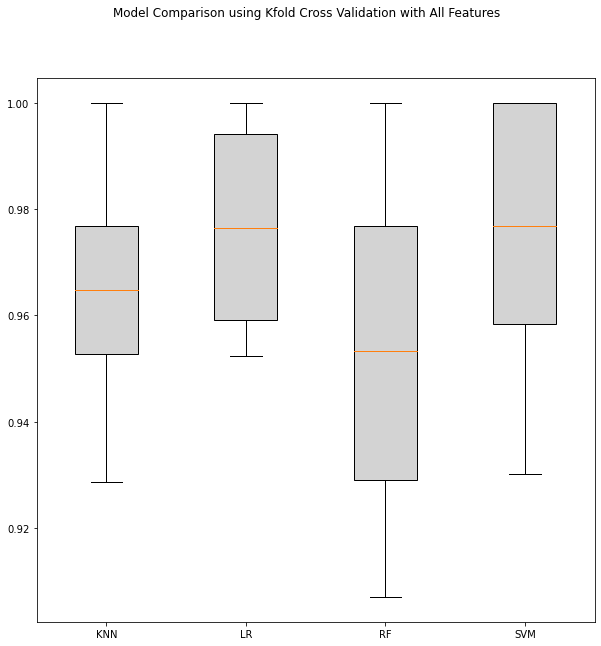

In [37]:
figure = plt.figure(figsize=(10,10))
figure.suptitle('Model Comparison using Kfold Cross Validation with All Features')
ax = figure.add_subplot(111)
box = ax.boxplot(results,  
                    vert=True,  
                     patch_artist=True,
                     labels=names) 

for b in box['boxes']:
    b.set(facecolor='lightgrey')

plt.show()

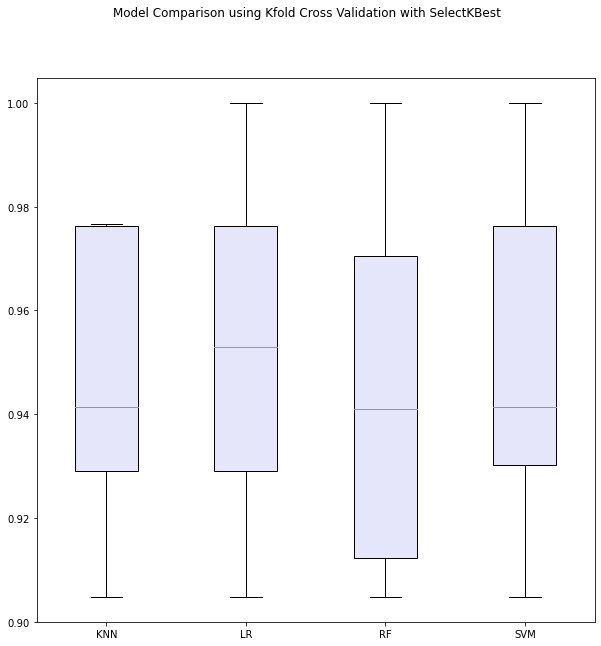

In [38]:
figure = plt.figure(figsize=(10,10))
figure.suptitle('Model Comparison using Kfold Cross Validation with SelectKBest')
ax = figure.add_subplot(111)
box = ax.boxplot(results_sk,  
                    vert=True,  
                     patch_artist=True,
                     labels=names) 

for b in box['boxes']:
    b.set(facecolor='lavender')

plt.show()

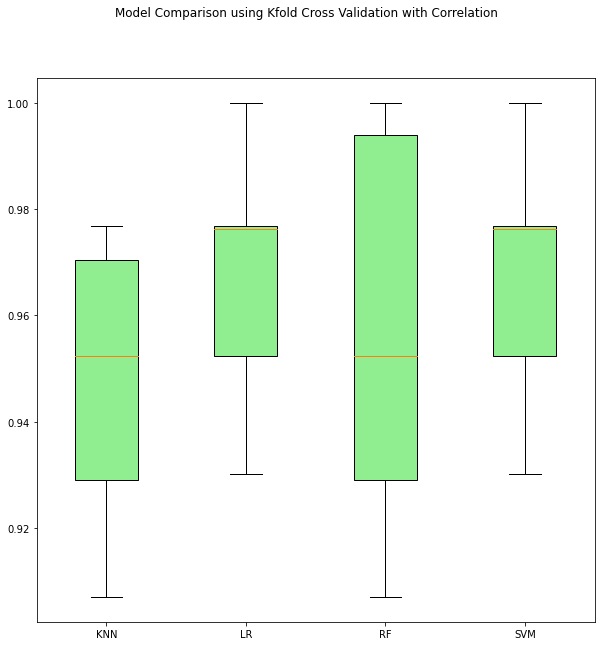

In [39]:
figure = plt.figure(figsize=(10,10))
figure.suptitle('Model Comparison using Kfold Cross Validation with Correlation')
ax = figure.add_subplot(111)
box = ax.boxplot(results_cs,  
                    vert=True,  
                     patch_artist=True,
                     labels=names) 

for b in box['boxes']:
    b.set(facecolor='lightgreen')

plt.show()

## Confusion Matrix and Classification Reports

In [40]:
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
target_names = ["BENIGN", "MALIGNANT"]

### KNN Summary

In [41]:
all_y_predict = knn_all.predict(X_test_scaled)
sk_y_predict = knn_sk.predict(X_test_scaled_sk)
cs_y_predict = knn_cs.predict(X_test_scaled_cs)

In [42]:
all_y_predict

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0.])

In [43]:
encoded_y_test

,0.000000000000000000e+00
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
137,0.0
138,1.0
139,0.0
140,1.0


Text(0.5, 1.0, 'KNN All Features Report')

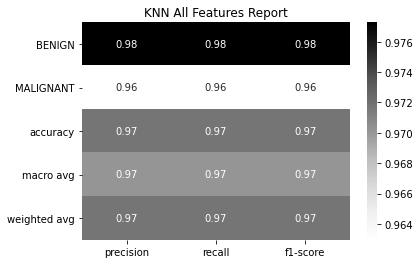

In [44]:
report = classification_report(encoded_y_test,all_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greys')
plt.title('KNN All Features Report')

Text(0.5, 1.0, 'KNN SK Features Report')

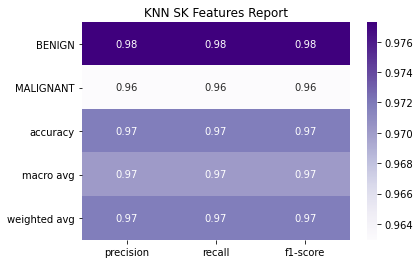

In [45]:
report = classification_report(encoded_y_test,sk_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Purples')
plt.title('KNN SK Features Report')

Text(0.5, 1.0, 'KNN Correlation Features Report')

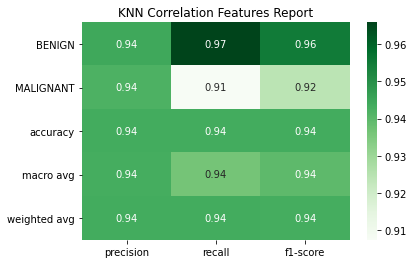

In [46]:
report = classification_report(encoded_y_test,cs_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greens')
plt.title('KNN Correlation Features Report')

In [47]:
encoded_y_test

,0.000000000000000000e+00
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
137,0.0
138,1.0
139,0.0
140,1.0


In [48]:
all_y_predict

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0.])

In [49]:
cm_knn_all = confusion_matrix(encoded_y_test,all_y_predict)
cm_knn_sk = confusion_matrix(encoded_y_test,sk_y_predict)
cm_knn_cs = confusion_matrix(encoded_y_test,cs_y_predict)

Text(33.0, 0.5, 'Predicted Class')

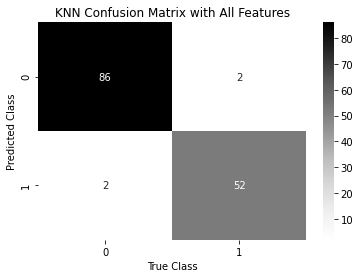

In [50]:
sns.heatmap(cm_knn_all ,annot=True, cmap="Greys")
plt.title('KNN Confusion Matrix with All Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

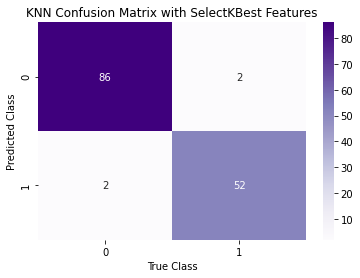

In [51]:
sns.heatmap(cm_knn_sk ,annot=True, cmap="Purples")
plt.title('KNN Confusion Matrix with SelectKBest Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

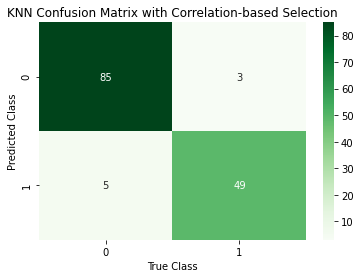

In [52]:
sns.heatmap(cm_knn_cs ,annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix with Correlation-based Selection')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

### Logistic Regression Summary

In [53]:
all_y_predict = log_reg_all.predict(X_test_scaled)
sk_y_predict = log_reg_sk.predict(X_test_scaled_sk)
cs_y_predict = log_reg_cs.predict(X_test_scaled_cs)

Text(0.5, 1.0, 'LR All Features Report')

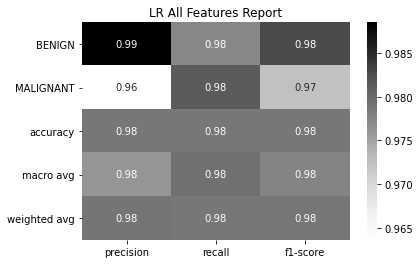

In [54]:
report = classification_report(encoded_y_test,all_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greys')
plt.title('LR All Features Report')

Text(0.5, 1.0, 'LR SK Features Report')

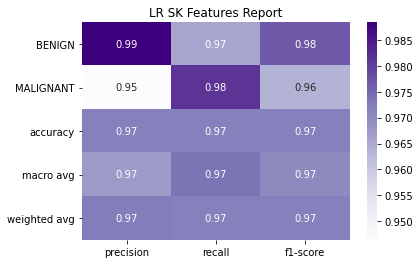

In [55]:
report = classification_report(encoded_y_test,sk_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Purples')
plt.title('LR SK Features Report')

Text(0.5, 1.0, 'LR Correlation Features Report')

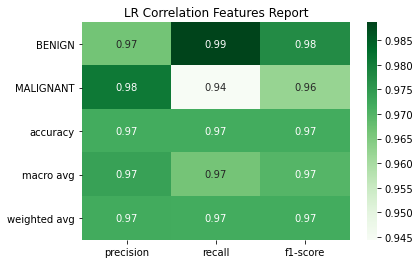

In [56]:
report = classification_report(encoded_y_test,cs_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greens')
plt.title('LR Correlation Features Report')

In [57]:
cm_lg_all = confusion_matrix(encoded_y_test,all_y_predict)
cm_lg_sk = confusion_matrix(encoded_y_test,sk_y_predict)
cm_lg_cs = confusion_matrix(encoded_y_test,cs_y_predict)

Text(33.0, 0.5, 'Predicted Class')

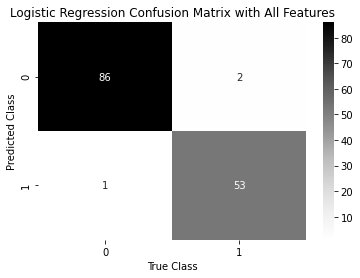

In [58]:
sns.heatmap(cm_lg_all ,annot=True, cmap='Greys')
plt.title('Logistic Regression Confusion Matrix with All Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

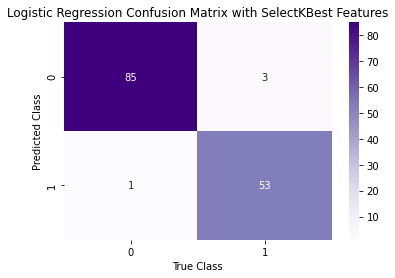

In [59]:
sns.heatmap(cm_lg_sk ,annot=True, cmap='Purples')
plt.title('Logistic Regression Confusion Matrix with SelectKBest Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

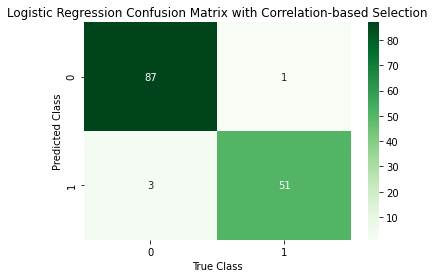

In [60]:
sns.heatmap(cm_lg_cs ,annot=True, cmap='Greens')
plt.title('Logistic Regression Confusion Matrix with Correlation-based Selection')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

### Neural Network Summary

In [61]:
all_y_predict = deep_model_all.predict(X_test_scaled)
sk_y_predict = deep_model_sk.predict(X_test_scaled_sk)
cs_y_predict = deep_model_cs.predict(X_test_scaled_cs)

In [62]:
all_y_predict_new = []
sk_y_predict_new = []
cs_y_predict_new = []
for list in all_y_predict:
    all_y_predict_new.append(round(list[1],0))
for list in sk_y_predict:
    sk_y_predict_new.append(round(list[1],0))
for list in cs_y_predict:
    cs_y_predict_new.append(round(list[1],0))

Text(0.5, 1.0, 'Neural Network All Features Report')

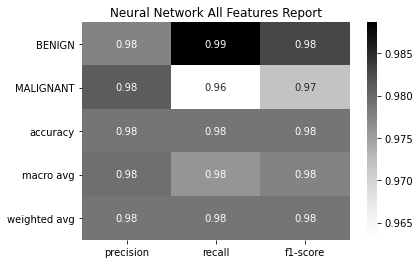

In [63]:
#print(classification_report(y_test_categorical.iloc[:,].values,all_y_predict_new))

report = classification_report(encoded_y_test,all_y_predict_new, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greys')
plt.title('Neural Network All Features Report')

Text(0.5, 1.0, 'Neural Network SK Features Report')

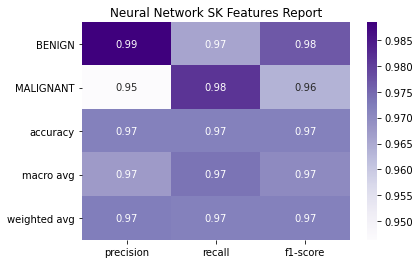

In [64]:
#print(classification_report(y_test_categorical.iloc[:,0].values,sk_y_predict_new))
report = classification_report(encoded_y_test,sk_y_predict_new, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Purples')
plt.title('Neural Network SK Features Report')

Text(0.5, 1.0, 'Neural Network Correlation Features Report')

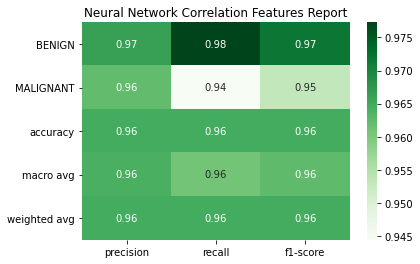

In [65]:
#print(classification_report(encoded_y_test,cs_y_predict_new))
report = classification_report(encoded_y_test,cs_y_predict_new, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greens')
plt.title('Neural Network Correlation Features Report')

In [66]:
cm_nn_all = confusion_matrix(encoded_y_test,all_y_predict_new)
cm_nn_sk = confusion_matrix(encoded_y_test,sk_y_predict_new)
cm_nn_cs = confusion_matrix(encoded_y_test,cs_y_predict_new)

Text(33.0, 0.5, 'Predicted Class')

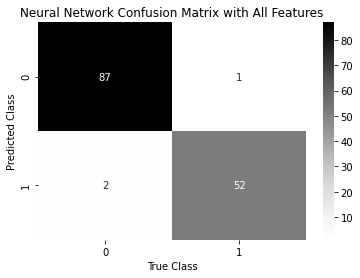

In [67]:
sns.heatmap(cm_nn_all ,annot=True, cmap='Greys')
plt.title('Neural Network Confusion Matrix with All Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

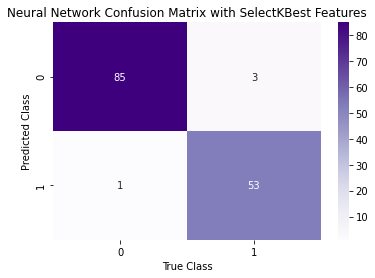

In [68]:
sns.heatmap(cm_nn_sk ,annot=True, cmap='Purples')
plt.title('Neural Network Confusion Matrix with SelectKBest Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

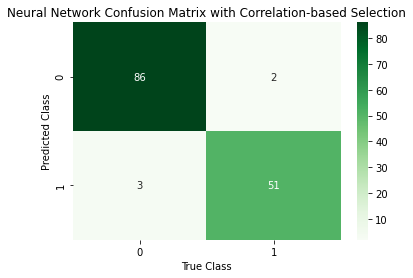

In [69]:
sns.heatmap(cm_nn_cs ,annot=True, cmap='Greens')
plt.title('Neural Network Confusion Matrix with Correlation-based Selection')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

### Random Forest Summary

In [70]:
all_y_predict = random_forest_all.predict(X_test_scaled)
sk_y_predict = random_forest_sk.predict(X_test_scaled_sk)
cs_y_predict = random_forest_cs.predict(X_test_scaled_cs)

Text(0.5, 1.0, 'RF All Features Report')

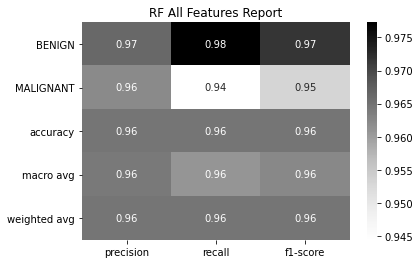

In [71]:
report = classification_report(encoded_y_test,all_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greys')
plt.title('RF All Features Report')

Text(0.5, 1.0, 'RF SK Features Report')

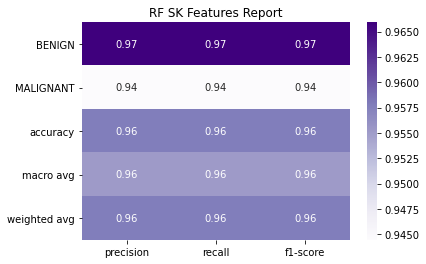

In [72]:
report = classification_report(encoded_y_test,sk_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Purples')
plt.title('RF SK Features Report')

Text(0.5, 1.0, 'RF Correlation Features Report')

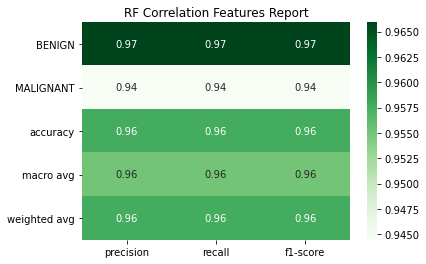

In [73]:
report = classification_report(encoded_y_test,cs_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greens')
plt.title('RF Correlation Features Report')

In [74]:
cm_rf_all = confusion_matrix(encoded_y_test,all_y_predict)
cm_rf_sk = confusion_matrix(encoded_y_test,sk_y_predict)
cm_rf_cs = confusion_matrix(encoded_y_test,cs_y_predict)

Text(33.0, 0.5, 'Predicted Class')

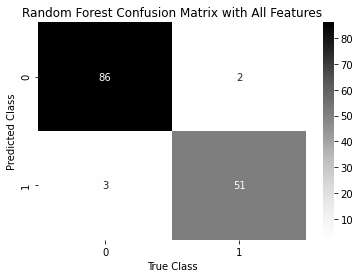

In [75]:
sns.heatmap(cm_rf_all ,annot=True, cmap="Greys")
plt.title('Random Forest Confusion Matrix with All Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

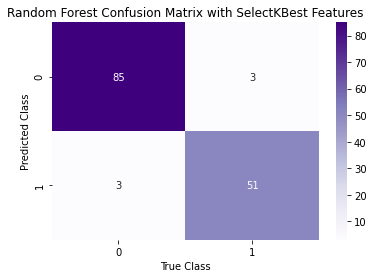

In [76]:
sns.heatmap(cm_rf_sk ,annot=True, cmap="Purples")
plt.title('Random Forest Confusion Matrix with SelectKBest Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

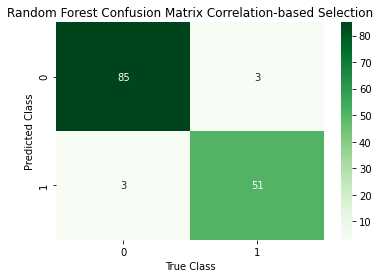

In [77]:
sns.heatmap(cm_rf_cs ,annot=True, cmap="Greens")
plt.title('Random Forest Confusion Matrix Correlation-based Selection')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

### SVM Summary

In [78]:
all_y_predict = svm_all.predict(X_test_scaled)
sk_y_predict = svm_sk.predict(X_test_scaled_sk)
cs_y_predict = svm_cs.predict(X_test_scaled_cs)

Text(0.5, 1.0, 'SVM All Features Report')

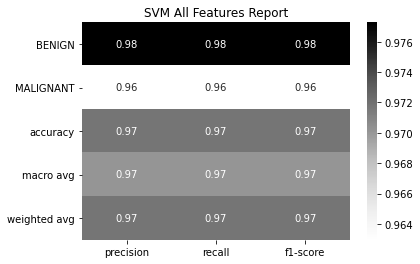

In [79]:
report = classification_report(encoded_y_test,all_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greys')
plt.title('SVM All Features Report')

Text(0.5, 1.0, 'SVM SK Features Report')

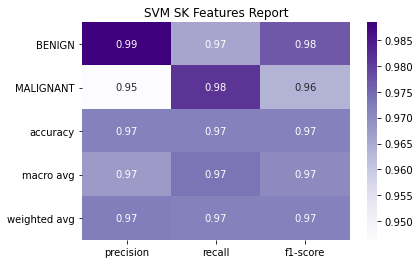

In [80]:
report = classification_report(encoded_y_test,sk_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Purples')
plt.title('SVM SK Features Report')

Text(0.5, 1.0, 'SVM Correlation Features Report')

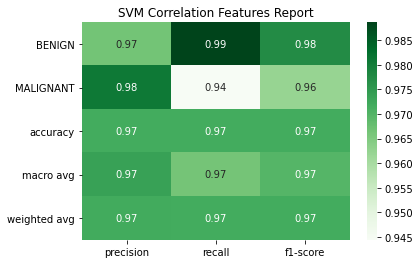

In [81]:
report = classification_report(encoded_y_test,cs_y_predict, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greens')
plt.title('SVM Correlation Features Report')

In [82]:
cm_svm_all = confusion_matrix(encoded_y_test,all_y_predict)
cm_svm_sk = confusion_matrix(encoded_y_test,sk_y_predict)
cm_svm_cs = confusion_matrix(encoded_y_test,cs_y_predict)

Text(33.0, 0.5, 'Predicted Class')

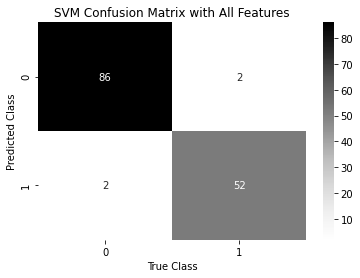

In [83]:
sns.heatmap(cm_svm_all ,annot=True, cmap="Greys")
plt.title('SVM Confusion Matrix with All Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

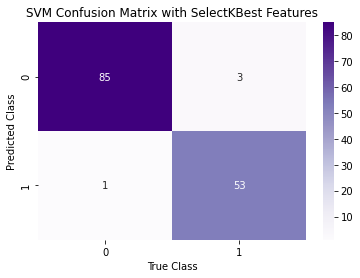

In [84]:
sns.heatmap(cm_svm_sk ,annot=True, cmap="Purples")
plt.title('SVM Confusion Matrix with SelectKBest Features')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

Text(33.0, 0.5, 'Predicted Class')

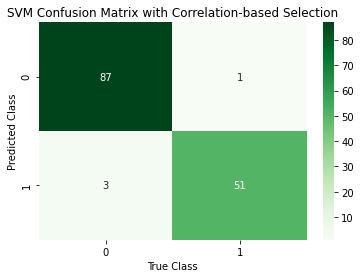

In [85]:
sns.heatmap(cm_svm_cs ,annot=True, cmap="Greens")
plt.title('SVM Confusion Matrix with Correlation-based Selection')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')